In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('earthquake_dataset.csv')

In [3]:
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312


In [4]:
data['Richter Category'] = 0
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,0


In [5]:
def getRichter(magnitude):
    if (magnitude < 3.0):
        return 0
    elif (magnitude < 4.0):
        return 1
    elif (magnitude < 5.0):
        return 2
    elif (magnitude < 6.0):
        return 3
    elif (magnitude < 7.0):
        return 4
    elif (magnitude < 8.0):
        return 5
    else:
        return 6

In [6]:
for index, row in data.iterrows():
    data.loc[index, 'Richter Category'] = getRichter(row['Mag'])
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,1


In [7]:
data.describe()  #display the summarized info of dataset

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
count,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000
mean,14.431767,2.345543,1230.412642,10.028420,124.899381,28.091410,2.416224,37.751540,267.015883,57.754619,6802.970016,0.247164
std,8.563833,1.111057,749.904752,3.620895,2.371969,33.602533,0.711643,44.809418,142.661262,26.932841,2257.336497,0.533840
min,1.000000,1.000000,100.000000,1.930000,118.550000,0.000000,1.100000,0.000000,0.000000,0.000000,1005.000000,0.000000
25%,7.000000,1.000000,511.250000,8.150000,123.170000,9.000000,1.900000,11.000000,164.000000,31.000000,5107.000000,0.000000
50%,14.000000,2.000000,1222.000000,8.760000,126.120000,22.000000,2.300000,23.000000,242.000000,73.000000,8210.000000,0.000000
75%,21.000000,3.000000,1932.000000,11.830000,126.610000,32.000000,2.800000,51.000000,364.000000,81.000000,8311.000000,0.000000
max,31.000000,4.000000,2459.000000,23.800000,128.440000,543.000000,7.500000,472.000000,588.000000,88.000000,9811.000000,5.000000


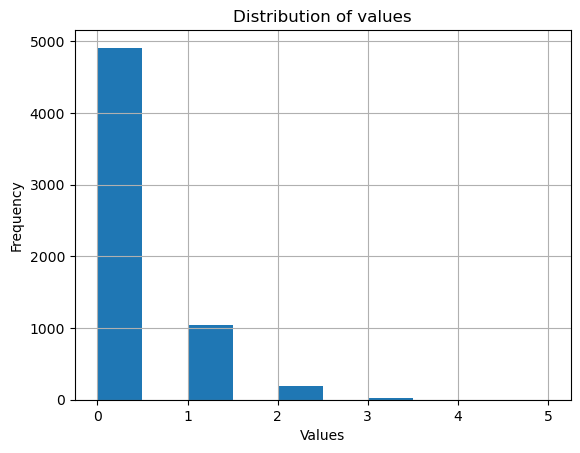

In [8]:
import matplotlib.pyplot as plt

data['Richter Category'].hist()  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

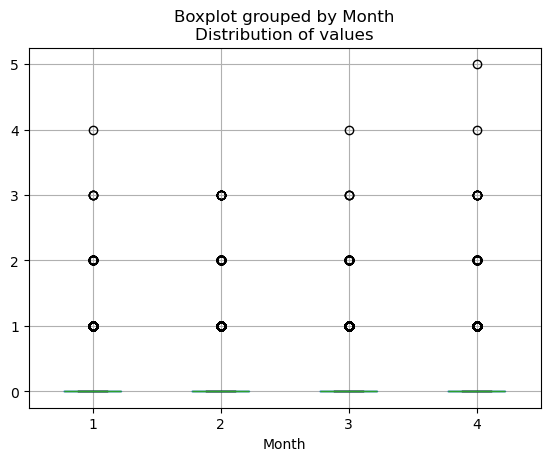

In [9]:
data.boxplot(column='Richter Category', by='Month')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In here we can see that most of our earthquakes are very micro ones that does not really straightforwardly affect people

In [10]:
X = data.drop(['Richter Category', 'Mag', 'Depth(km)', 'Distance(km)'], axis=1)
y = data['Richter Category']

In [11]:
X.columns  #display X columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'City',
       'Province', 'Zip Code'],
      dtype='object')

In [12]:
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),City,Province,Zip Code
0,25,4,1919,8.50,124.42,292,53,9019
1,25,4,1813,18.13,120.81,124,37,2911
2,25,4,1808,14.71,121.78,251,68,2412
3,25,4,1706,5.64,126.33,267,30,8014
4,25,4,1647,8.07,126.71,314,81,8312


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Richter Category, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
for feature in X.columns:
    scaler = StandardScaler()
    X[[feature]] = scaler.fit_transform(X[[feature]])
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),City,Province,Zip Code
0,1.234154,1.489205,0.918308,-0.422145,-0.202119,0.175143,-0.176550,0.981781
1,1.234154,1.489205,0.776945,2.237634,-1.724184,-1.002567,-0.770669,-1.724282
2,1.234154,1.489205,0.770277,1.293039,-1.315208,-0.112274,0.380436,-1.945357
3,1.234154,1.489205,0.634248,-1.212069,0.603184,-0.000111,-1.030596,0.536530
4,1.234154,1.489205,0.555565,-0.540910,0.763402,0.329367,0.863157,0.668554


In [15]:
X.shape

(6170, 8)

In [16]:
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),City,Province,Zip Code
0,1.234154,1.489205,0.918308,-0.422145,-0.202119,0.175143,-0.176550,0.981781
1,1.234154,1.489205,0.776945,2.237634,-1.724184,-1.002567,-0.770669,-1.724282
2,1.234154,1.489205,0.770277,1.293039,-1.315208,-0.112274,0.380436,-1.945357
3,1.234154,1.489205,0.634248,-1.212069,0.603184,-0.000111,-1.030596,0.536530
4,1.234154,1.489205,0.555565,-0.540910,0.763402,0.329367,0.863157,0.668554


In [17]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [18]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((4319, 8), (4319,))

In [19]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((1851, 8), (1851,))

In [20]:
X_train.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),City,Province,Zip Code
450,0.183138,1.489205,0.498220,-0.485671,0.708591,-0.175366,0.863157,0.667668
619,-0.167201,1.489205,1.032998,-0.400050,0.582103,-1.395137,0.863157,0.667225
1288,1.701273,-1.211146,0.242167,-0.626531,0.337561,1.450996,-1.104860,-2.467253
1928,0.183138,-1.211146,1.183696,-0.389002,0.830862,-0.175366,0.863157,0.667668
1247,1.934832,-1.211146,-1.182129,2.732027,-1.344722,1.324813,-1.698979,-1.284348


In [21]:
y_train.head()

450     0
619     0
1288    0
1928    0
1247    0
Name: Richter Category, dtype: int64

In [22]:
X_test.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),City,Province,Zip Code
5083,0.767036,0.589088,-1.058104,-0.960730,0.434535,-0.238457,-0.993463,0.623365
3847,-0.050422,-0.311029,0.438208,-0.474623,0.725456,-0.175366,0.863157,0.667668
4528,-1.568556,-0.311029,1.069006,0.931221,-1.327857,-1.325035,-0.287948,-0.843084
2526,-0.867879,-1.211146,0.830289,-0.355858,0.632698,0.679876,0.863157,0.665896
5349,0.299917,0.589088,-1.500862,0.779313,-0.813475,-0.659068,-0.250815,-1.454917


In [23]:
y_test.head()

5083    0
3847    2
4528    0
2526    0
5349    0
Name: Richter Category, dtype: int64

In [24]:
X_train.isnull().sum()  #check x_train for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
City              0
Province          0
Zip Code          0
dtype: int64

In [25]:
y_train.isnull().sum()  #check y_train for null values

0

In [26]:
X_test.isnull().sum()  #check x_test for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
City              0
Province          0
Zip Code          0
dtype: int64

In [27]:
y_test.isnull().sum()  #check y_test for null values

0

In [35]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [29]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [30]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [31]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [32]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [39]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [38]:
#import libraries for SVM
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()     
ada_boost.fit(X_train,y_train)

#make predictions and store data for later
y_pred_ada = ada_boost.predict(X_test)

#get the accuracy score
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)

In [46]:
#import libraries for SVM
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()     
bg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_bg = bg.predict(X_test)

#get the accuracy score
acc_bg = round(accuracy_score(y_test,y_pred_bg)*100,2)

In [45]:
#import libraries for SVM
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()     
etc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_etc = etc.predict(X_test)

#get the accuracy score
acc_etc = round(accuracy_score(y_test,y_pred_etc)*100,2)

In [49]:
#import libraries for SVM
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()     
hgb.fit(X_train,y_train)

#make predictions and store data for later
y_pred_hgb = hgb.predict(X_test)

#get the accuracy score
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)

In [55]:
#import libraries for SVM
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()     
mlpc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_mlpc = mlpc.predict(X_test)

#get the accuracy score
acc_mlpc = round(accuracy_score(y_test,y_pred_mlpc)*100,2)

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
bnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_bnb = bnb.predict(X_test)  

#get the accuracy score
acc_bnb = round(accuracy_score(y_test,y_pred_bnb)*100,2)

In [62]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier() 
ext.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_ext = ext.predict(X_test)  

#get the accuracy score
acc_ext = round(accuracy_score(y_test,y_pred_ext)*100,2)

In [64]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dc = dc.predict(X_test)  

#get the accuracy score
acc_dc = round(accuracy_score(y_test,y_pred_dc)*100,2)

In [65]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes','Support Vector Machine', 'Ada Boost', 
              'Bagging Classifier', 'Extra Trees', 'Hist Gradient Boosting',
              'MLPC Classifier', 'Bernoulli NB', 'Extra Tree Classifier', 'Dummy Classifier'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_svm, acc_ada, acc_bg, acc_etc, acc_hgb, acc_mlpc, acc_bnb, acc_ext, acc_dc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
80.50,MLPC Classifier
80.23,Random Forest
80.06,Gradient Boosting
79.74,Ada Boost
79.04,Naive Bayes
79.04,Bernoulli NB
79.04,Dummy Classifier
78.61,Bagging Classifier
77.90,Extra Trees


Due to Random Forest having the highest accuracy, we will choose this as our main classifier model.

In [72]:
mlpc.score(X_test, y_test)

0.8049702863317126

In [37]:
y_pred_gb  #display prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_test  #display actual values

5083    0
3847    2
4528    0
2526    0
5349    0
       ..
3807    0
6100    2
440     0
2689    1
4999    0
Name: Richter Category, Length: 1851, dtype: int64

In [39]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_rf)).mean()
RMSE = (math.sqrt(MSE)) 
print(RMSE)

0.5421210121257269


In [40]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[1419   42    2    0]
 [ 256   62    4    0]
 [  42   11    4    2]
 [   5    2    0    0]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

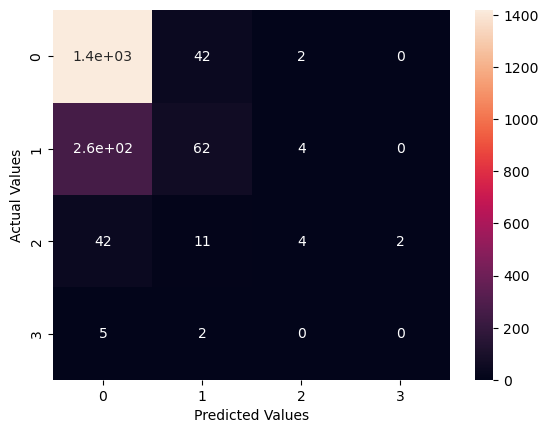

In [41]:
import seaborn as sns  #import package for plotting

#confusion matrix
cm = pd.crosstab(y_test, y_pred_rf, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)

# Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from time import time
